In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema

In [3]:
# final kmatrix
with open('/Users/arjuns/Downloads/code_res_paper/paper-results-code/weisfeilerlehman/final_kernel_matrix/complete_kernel_matrix_v2.pkl', 'rb') as f:
    kmatrix = pickle.load(f)

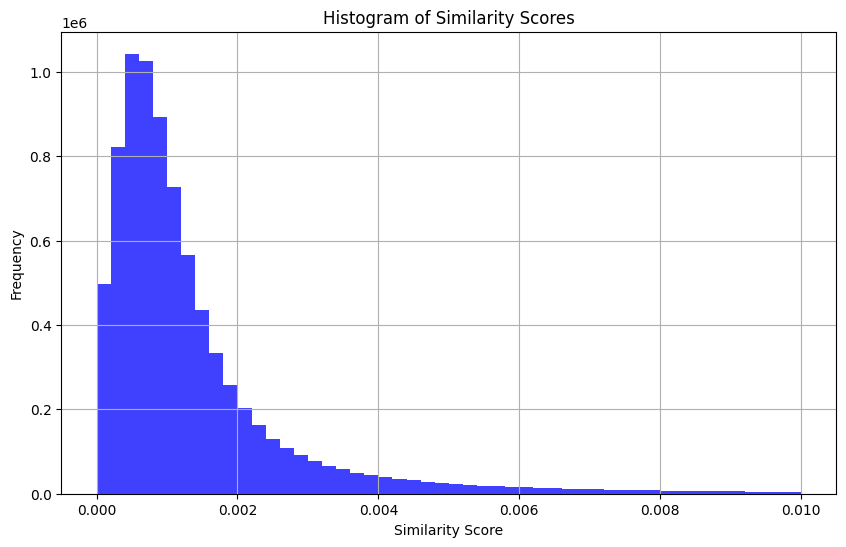

In [4]:
similarity_matrix = np.array(kmatrix)
similarity_matrix = (similarity_matrix + similarity_matrix.T) / 2

np.fill_diagonal(similarity_matrix, 0) # Remove self-similarities

# Flatten the matrix and remove zero values (self-similarities already removed)
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=50, alpha=0.75, color='blue', range=(0, 0.01))
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


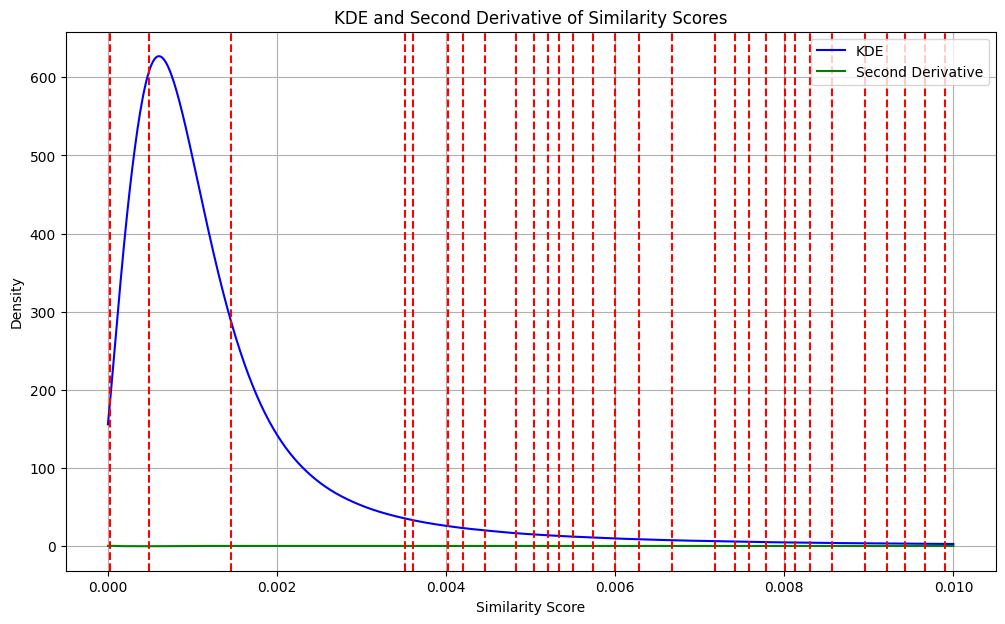

array([2.00200200e-05, 1.46146146e-03, 3.61361361e-03, 4.19419419e-03,
       4.82482482e-03, 5.20520521e-03, 5.49549550e-03, 5.99599600e-03,
       6.66666667e-03, 7.41741742e-03, 7.78778779e-03, 8.12812813e-03,
       8.55855856e-03, 9.21921922e-03, 9.65965966e-03, 4.80480480e-04,
       3.51351351e-03, 4.02402402e-03, 4.45445445e-03, 5.04504505e-03,
       5.33533534e-03, 5.73573574e-03, 6.28628629e-03, 7.17717718e-03,
       7.58758759e-03, 8.00800801e-03, 8.30830831e-03, 8.94894895e-03,
       9.42942943e-03, 9.89989990e-03])

In [5]:
# Step 1: KDE to estimate the probability density function
kde = gaussian_kde(similarity_scores)
x_grid = np.linspace(0, 0.01, 1000)  # Define a grid over our range of interest
kde_pdf = kde.evaluate(x_grid)

# Step 2: Calculate the second derivative
kde_pdf_second_derivative = np.gradient(np.gradient(kde_pdf))

# Step 3: Identify inflection points (changes in the sign of the second derivative)
# We're interested in local minima and maxima as potential inflection points
inflection_points_indices = argrelextrema(kde_pdf_second_derivative, np.greater)[0]  # Local maxima
inflection_points_indices = np.append(inflection_points_indices, argrelextrema(kde_pdf_second_derivative, np.less)[0])  # Local minima
inflection_points = x_grid[inflection_points_indices]

# Plotting for visualization
plt.figure(figsize=(12, 7))

# KDE plot
plt.plot(x_grid, kde_pdf, label='KDE', color='blue')

# Second derivative plot
plt.plot(x_grid, kde_pdf_second_derivative, label='Second Derivative', color='green')

# Mark inflection points
for inflection_point in inflection_points:
    plt.axvline(x=inflection_point, color='red', linestyle='--')

plt.title('KDE and Second Derivative of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

inflection_points

In [ ]:
five = np.percentile(similarity_matrix, 5)
ninety_five = np.percentile(similarity_matrix, 95)

inflection_points = np.append(inflection_points, [ninety_five, five])

In [ ]:
with open('inflection_points.pkl', 'wb') as f:
    pickle.dump(inflection_points, f)